In [1]:
import numpy as np
import pandas as pd
import gurobi as gp
import matplotlib.pyplot as plt
import os

In [2]:
# Read CSV files
stocks_19 = pd.read_csv('stocks2019.csv', index_col=0)
stocks_20 = pd.read_csv('stocks2020.csv', index_col=0)

# Gurobi time limit
gurobi_time_limit = 3600

index_name = stocks_19.columns.values[:1][0]
print(index_name)
stock_names = stocks_19.columns.values[1:]
num_stocks = len(stock_names)
stock_names

NDX


array(['ATVI', 'ADBE', 'AMD', 'ALXN', 'ALGN', 'GOOGL', 'GOOG', 'AMZN',
       'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'ADSK', 'ADP',
       'BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CERN',
       'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTXS', 'CTSH', 'CMCSA', 'CPRT',
       'COST', 'CSX', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'EXPE',
       'FB', 'FAST', 'FISV', 'GILD', 'IDXX', 'ILMN', 'INCY', 'INTC',
       'INTU', 'ISRG', 'JD', 'KLAC', 'KHC', 'LRCX', 'LBTYA', 'LBTYK',
       'LULU', 'MAR', 'MXIM', 'MELI', 'MCHP', 'MU', 'MSFT', 'MRNA',
       'MDLZ', 'MNST', 'NTES', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'PCAR',
       'PAYX', 'PYPL', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN',
       'SIRI', 'SWKS', 'SPLK', 'SBUX', 'SNPS', 'TMUS', 'TTWO', 'TSLA',
       'TXN', 'TCOM', 'ULTA', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY',
       'WDC', 'XEL', 'XLNX'], dtype=object)

In [3]:
stocks_19.head()

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-01-02,6360.870117,46.350380,224.570007,18.830000,98.050003,202.119995,1054.680054,1045.849976,1539.130005,182.458298,...,27.590000,247.970001,147.759995,107.364159,164.080002,63.920757,159.740005,36.312473,46.041862,84.600266
2019-01-03,6147.129883,44.704514,215.699997,17.049999,100.209999,184.779999,1025.469971,1016.059998,1500.280029,179.681961,...,26.959999,243.360001,142.589996,104.083450,163.729996,63.253742,154.020004,33.835327,45.860447,81.414970
2019-01-04,6422.669922,46.488358,226.190002,19.000000,106.000000,186.710007,1078.069946,1070.709961,1575.390015,185.824142,...,28.549999,255.029999,148.970001,108.678413,172.699997,65.358139,163.350006,35.268467,46.309223,85.184715
2019-01-07,6488.250000,47.799141,229.259995,20.570000,107.940002,189.919998,1075.920044,1068.390015,1629.510010,188.324738,...,29.180000,271.000000,151.399994,108.787117,175.850006,65.733910,163.500000,36.521275,46.108707,87.434891
2019-01-08,6551.850098,49.247898,232.679993,20.750000,108.610001,192.949997,1085.369995,1076.280029,1656.579956,190.739777,...,29.480000,276.000000,156.919998,109.755516,178.190002,67.049149,166.949997,36.170105,46.643410,85.769180


In [4]:
returns_19 = stocks_19.apply(lambda x: (x-x.shift(1))/x.shift(1))[1:]
returns_19.head()

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.033602,-0.035509,-0.039498,-0.094530,0.022030,-0.085791,-0.027696,-0.028484,-0.025242,-0.015216,...,-0.022834,-0.018591,-0.034989,-0.030557,-0.002133,-0.010435,-0.035808,-0.068217,-0.003940,-0.037651
2019-01-04,0.044824,0.039903,0.048632,0.114370,0.057779,0.010445,0.051294,0.053786,0.050064,0.034184,...,0.058976,0.047954,0.044744,0.044147,0.054785,0.033269,0.060577,0.042356,0.009786,0.046303
2019-01-07,0.010211,0.028196,0.013573,0.082632,0.018302,0.017192,-0.001994,-0.002167,0.034353,0.013457,...,0.022067,0.062620,0.016312,0.001000,0.018240,0.005749,0.000918,0.035522,-0.004330,0.026415
2019-01-08,0.009802,0.030309,0.014918,0.008751,0.006207,0.015954,0.008783,0.007385,0.016612,0.012824,...,0.010281,0.018450,0.036460,0.008902,0.013307,0.020009,0.021101,-0.009615,0.011597,-0.019051
2019-01-09,0.007454,0.017210,0.011819,-0.026988,0.012430,0.038196,-0.003427,-0.001505,0.001714,-0.001196,...,0.023745,0.018804,-0.008157,0.003781,0.023065,0.012050,-0.004612,0.044083,-0.007984,0.008972


In [5]:
corr_matrix = returns_19.iloc[:,1:].corr()
corr_matrix

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
ATVI,1.000000,0.399939,0.365376,0.223162,0.216280,0.433097,0.426777,0.467076,0.203956,0.329355,...,0.322906,0.128241,0.464850,0.316549,0.259679,0.218149,0.311659,0.303077,0.043389,0.249667
ADBE,0.399939,1.000000,0.452848,0.368928,0.363370,0.552125,0.540404,0.598237,0.291978,0.473815,...,0.360392,0.201151,0.711339,0.541243,0.402171,0.228106,0.650430,0.361516,0.207403,0.289497
AMD,0.365376,0.452848,1.000000,0.301831,0.344252,0.418861,0.417254,0.549302,0.151452,0.503733,...,0.332776,0.210623,0.498342,0.330900,0.272983,0.281950,0.407626,0.438892,0.017283,0.478010
ALXN,0.223162,0.368928,0.301831,1.000000,0.332433,0.315993,0.307698,0.363170,0.342022,0.317040,...,0.257143,0.408936,0.350581,0.191489,0.522423,0.192720,0.416396,0.289908,0.047947,0.200356
ALGN,0.216280,0.363370,0.344252,0.332433,1.000000,0.248747,0.250316,0.399281,0.264599,0.328280,...,0.175957,0.128559,0.360886,0.251855,0.334978,0.219595,0.308968,0.284407,0.088059,0.253934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.218149,0.228106,0.281950,0.192720,0.219595,0.232900,0.230603,0.288168,0.194490,0.347861,...,0.257049,0.145330,0.195475,0.126118,0.214585,1.000000,0.211641,0.296309,-0.130798,0.276643
WDAY,0.311659,0.650430,0.407626,0.416396,0.308968,0.379493,0.371826,0.424748,0.211712,0.351734,...,0.235045,0.269545,0.569672,0.401476,0.376047,0.211641,1.000000,0.315699,0.209240,0.254117
WDC,0.303077,0.361516,0.438892,0.289908,0.284407,0.328619,0.322110,0.419620,0.172623,0.602935,...,0.377215,0.126463,0.331916,0.308558,0.314773,0.296309,0.315699,1.000000,-0.076115,0.516958
XEL,0.043389,0.207403,0.017283,0.047947,0.088059,0.059930,0.052570,0.076724,0.137857,-0.047259,...,-0.172752,0.074686,0.280371,0.407770,0.191667,-0.130798,0.209240,-0.076115,1.000000,-0.117552


### Stock Selection

In [157]:
mod = gp.Model()

y = mod.addMVar(num_stocks, vtype="B")
x = mod.addMVar((num_stocks, num_stocks), vtype="B")

# Number of stocks in our fund
m = 5

In [158]:
# number of stocks in fund constraint
size_fund_c = mod.addConstr( gp.quicksum(y[i] for i in range(num_stocks)) == m)

# # all stocks represented by single stock constraint
stock_incl_c = mod.addConstrs( gp.quicksum( x[i][j] for j in range(num_stocks) ) == 1 for i in range(num_stocks))

# each stock represented by a stock on the fund
stock_rep_c = mod.addConstrs( x[i][j] <= y[j] for i in range(num_stocks) for j in range(num_stocks))


In [159]:
# Set objective value
mod.setObjective( gp.quicksum( x[i][j]*corr_matrix.iloc[i,j] for i in range(num_stocks) for j in range(num_stocks)) , gp.GRB.MAXIMIZE)
mod.Params.output_flag = 0
mod.optimize()


In [160]:
mod.ObjVal

54.83990652229106

In [161]:
selection_array = y.X
selected_stocks = stock_names[ y.X == 1]
selected_stocks

array(['LBTYK', 'MXIM', 'MSFT', 'VRTX', 'XEL'], dtype=object)

### Stock Weights

In [162]:
num_t = len(returns_19)

mod_w = gp.Model()
w = mod_w.addMVar(m)
y = mod_w.addMVar(num_t)

In [163]:
# Add of weigths of selected stocks equal to 1
w_cons = mod_w.addConstr( gp.quicksum(w[i] for i in range(m)) == 1)

# Absolute value constraints
abs_cons1 = mod_w.addConstrs( y[t] >= returns_19[index_name][t] - gp.quicksum(w[i]*returns_19[selected_stocks[i]][t] for i in range(m) ) for t in range(num_t))
abs_cons2 = mod_w.addConstrs( y[t] >= gp.quicksum(w[i]*returns_19[selected_stocks[i]][t] for i in range(m) ) - returns_19[index_name][t] for t in range(num_t))

In [164]:
mod_w.setObjective( gp.quicksum(y[t] for t in range(num_t)) )
mod_w.Params.output_flag = 0
mod_w.optimize()

In [165]:
stock_weights = w.X
stock_weights

array([0.04886175, 0.21038806, 0.58035198, 0.07119022, 0.089208  ])

In [166]:
mod_w.objVal

0.7891782824631451

### How well this portfolio perform in 2020

In [167]:
returns_20 = stocks_20.apply(lambda x: (x - x.shift(1))/x.shift(1))[1:]
returns_20.head()

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
1/3/20,-0.008827,0.000341,-0.007834,-0.010183,-0.013260,-0.011421,-0.005231,-0.004907,-0.012139,-0.006789,...,-0.021369,-0.017207,0.021095,0.009728,-0.006699,0.000000,0.005852,-0.015392,0.004809,-0.023020
1/6/20,0.006211,0.018238,0.005726,-0.004321,0.001598,0.019398,0.026654,0.024657,0.014886,0.007674,...,-0.013543,0.003118,0.009259,0.002294,0.027755,0.008632,0.006234,-0.019192,-0.001436,-0.020844
1/7/20,-0.000234,0.010043,-0.000959,-0.002893,0.002533,-0.009864,-0.001932,-0.000624,0.002092,-0.009405,...,0.045951,0.008528,0.002318,0.008369,-0.001071,-0.005035,0.020414,0.067698,-0.002077,0.022830
1/8/20,0.007452,-0.007623,0.013438,-0.008705,0.016191,0.010386,0.007118,0.007880,-0.007809,0.000756,...,-0.012323,0.019400,0.004626,0.009208,0.032620,-0.058357,0.033304,0.014484,-0.000961,-0.002815
1/9/20,0.008669,-0.009018,0.007636,0.023834,0.019893,0.036853,0.010498,0.011044,0.004799,0.002980,...,0.006781,0.021318,0.023169,0.009638,-0.003592,-0.020598,0.004309,-0.000291,0.002244,0.023493


In [168]:
performance = abs(returns_20[index_name] - sum(returns_20[selected_stocks[i]]*stock_weights[i] for i in range(m)))
performance.sum()

1.1124373455076464

### Do this with m = 10, 20, ..., n

In [169]:
portfolio_size = []
stock_selection = [selected_stocks]
stock_ws = [stock_weights]
perfs_19 = []
perfs_20 = []

for new_m in range(10,num_stocks+1,10):
    #
    # Stock Selection Model
    #
    mod = gp.Model()

    y = mod.addMVar(num_stocks, vtype="B")
    x = mod.addMVar((num_stocks, num_stocks), vtype="B")

    # Number of stocks in our fund
    m = new_m
    portfolio_size.append(new_m)

    # number of stocks in fund constraint
    size_fund_c = mod.addConstr( gp.quicksum(y[i] for i in range(num_stocks)) == m)

    # # all stocks represented by single stock constraint
    stock_incl_c = mod.addConstrs( gp.quicksum( x[i][j] for j in range(num_stocks) ) == 1 for i in range(num_stocks))

    # each stock represented by a stock on the fund
    stock_rep_c = mod.addConstrs( x[i][j] <= y[j] for i in range(num_stocks) for j in range(num_stocks))

    # Set objective value
    mod.setObjective( gp.quicksum( x[i][j]*corr_matrix.iloc[i,j] for i in range(num_stocks) for j in range(num_stocks)) , gp.GRB.MAXIMIZE)
    mod.Params.output_flag = 0
    mod.optimize()

    selection_array = y.X
    selected_stocks = stock_names[ y.X == 1]
    stock_selection.append(selected_stocks)
    #
    # Stock Weight Calculation
    #
    num_t = len(returns_19)
    num_t

    mod_w = gp.Model()
    w = mod_w.addMVar(m)
    y = mod_w.addMVar(num_t)

    # Add of weigths of selected stocks equal to 1
    w_cons = mod_w.addConstr( gp.quicksum(w[i] for i in range(m)) == 1)

    # Absolute value constraints
    abs_cons1 = mod_w.addConstrs( y[t] >= returns_19[index_name][t] - gp.quicksum(w[i]*returns_19[selected_stocks[i]][t] for i in range(m) ) for t in range(num_t))
    abs_cons2 = mod_w.addConstrs( y[t] >= gp.quicksum(w[i]*returns_19[selected_stocks[i]][t] for i in range(m) ) - returns_19[index_name][t] for t in range(num_t))

    mod_w.setObjective( gp.quicksum(y[t] for t in range(num_t)) )
    mod_w.Params.output_flag = 0
    mod_w.optimize()

    stock_weights = w.X
    stock_ws.append(stock_weights)

    #
    # Performance metric
    #
    performance_19 = abs(returns_19[index_name] - sum(returns_19[selected_stocks[i]]*stock_weights[i] for i in range(m)))
    perfs_19.append(performance_19.sum())

    performance_20 = abs(returns_20[index_name] - sum(returns_20[selected_stocks[i]]*stock_weights[i] for i in range(m)))
    perfs_20.append(performance_20.sum())


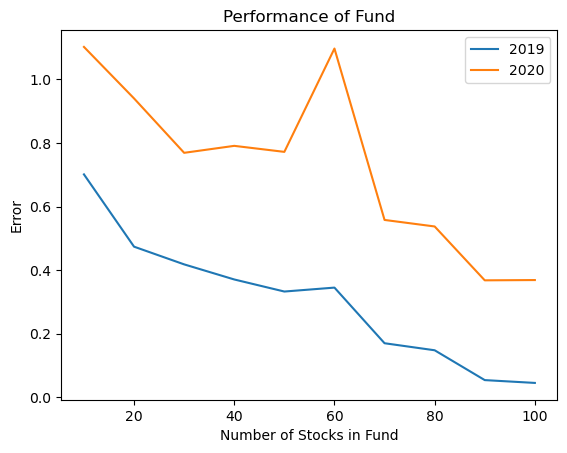

In [170]:
plt.plot(portfolio_size, perfs_19, label="2019")
plt.plot(portfolio_size, perfs_20, label="2020")

plt.ylabel('Error')
plt.xlabel('Number of Stocks in Fund')
plt.title('Performance of Fund')
plt.legend()

plt.show()

### Solving this problem as a MIP

In [35]:
def add_mip_result_to_pd(m, sel_stocks, sel_weights, df):
    # if index exists, update values
    if (m, 'stock_selected') in df.index:
        df.loc[m,"stock_selected"] = sel_stocks
        df.loc[m,"stock_weights"] = sel_weights
        return df

    # indexes
    sel_stocks_index = pd.MultiIndex.from_tuples([(m, 'stock_selected')], names=('m', 'stock_data'))
    sel_weights_index = pd.MultiIndex.from_tuples([(m, 'stock_weights')], names=('m', 'stock_data'))

    # Create a new DataFrame for the new row
    sel_stocks_df = pd.DataFrame([sel_stocks], columns=df.columns, index=sel_stocks_index)
    sel_weights_df = pd.DataFrame([sel_weights], columns=df.columns, index=sel_weights_index)

    # Concatenate the new row DataFrame with the original DataFrame
    df = pd.concat([df, sel_stocks_df])
    df = pd.concat([df, sel_weights_df])
    return df

#Initialize pandas dataframe
index = pd.MultiIndex.from_product([[m], ['stock_selected', 'stock_weights']], names=['m', 'stock_data'])
mip_results = pd.DataFrame(columns=stock_names, index=index)

In [21]:
num_t = len(returns_19)
m = 5

mod_mip = gp.Model()
w2 = mod_mip.addMVar(num_stocks)
z = mod_mip.addMVar(num_t)

# decision variables to know if we include or not the stock in the fund
stock_in_fund = mod_mip.addMVar(num_stocks, vtype='B')

In [22]:
# Add of weigths of selected stocks equal to 1
w_cons = mod_mip.addConstr( gp.quicksum(w2[i] for i in range(num_stocks)) == 1)

# only select m stocks
m_cons = mod_mip.addConstr( gp.quicksum(stock_in_fund[i] for i in range(num_stocks)) == m)

# weight can only take value if stock_in_fund selected
stocks_cons = mod_mip.addConstrs( w2[i] <= 2*stock_in_fund[i] for i in range(num_stocks))

# Absolute value constraints
abs_cons1 = mod_mip.addConstrs( z[t] >= returns_19[index_name][t] - gp.quicksum( w2[i]*returns_19.iloc[t,i+1] for i in range(num_stocks) ) for t in range(num_t))
abs_cons2 = mod_mip.addConstrs( z[t] >= gp.quicksum( w2[i]*returns_19.iloc[t,i+1] for i in range(num_stocks) ) - returns_19[index_name][t] for t in range(num_t))

In [251]:
mod_mip.setObjective( gp.quicksum(z[t] for t in range(num_t)) )
mod_mip.Params.output_flag = 0
mod_mip.Params.TimeLimit = gurobi_time_limit

# check if pandas file with results exists, if not optimize
if os.path.exists('mip_results.csv'):
    mip_results = pd.read_csv('mip_results.csv',index_col=("m","stock_data"))
else:
    mod_mip.optimize()
    mip_results = add_mip_result_to_pd(m, stock_in_fund.X, w2.X, mip_results)

In [257]:
s = mip_results.loc[5,"stock_selected"]
s = s[s == 1].index.values
s

array(['AMZN', 'ADI', 'AAPL', 'MSFT', 'MDLZ'], dtype=object)

In [259]:
w = mip_results.loc[5,"stock_weights"]
w = w.loc[s]
w.values

array([0.2501226 , 0.11375807, 0.19169221, 0.28986928, 0.15455784])

### Do MIP with m = 10, 20, ..., n

In [50]:
if os.path.exists('mip_results.csv'):
    mip_results = pd.read_csv('mip_results.csv',index_col=("m","stock_data"))
else:
    #
    # Set up Model
    #

    num_t = len(returns_19)
    mod_mip = gp.Model()
    w2 = mod_mip.addMVar(num_stocks)
    z = mod_mip.addMVar(num_t)

    # decision variables to know if we include or not the stock in the fund
    stock_in_fund = mod_mip.addMVar(num_stocks, vtype='B')

    # Add of weigths of selected stocks equal to 1
    w_cons = mod_mip.addConstr( gp.quicksum(w2[i] for i in range(num_stocks)) == 1)

    # only select m stocks
    m_cons = mod_mip.addConstr( gp.quicksum(stock_in_fund[i] for i in range(num_stocks)) == m)
    
    # weight can only take value if stock_in_fund selected
    stocks_cons = mod_mip.addConstrs( w2[i] <= 2*stock_in_fund[i] for i in range(num_stocks))

    # Absolute value constraints
    abs_cons1 = mod_mip.addConstrs( z[t] >= returns_19[index_name][t] - gp.quicksum( w2[i]*returns_19.iloc[t,i+1] for i in range(num_stocks) ) for t in range(num_t))
    abs_cons2 = mod_mip.addConstrs( z[t] >= gp.quicksum( w2[i]*returns_19.iloc[t,i+1] for i in range(num_stocks) ) - returns_19[index_name][t] for t in range(num_t))

    for new_m in range(10, num_stocks+1, 10):
        #
        # Set up new m, and remove previous m_cons
        #
        m = new_m
        mod_mip.remove(m_cons)
        # only select m stocks
        m_cons = mod_mip.addConstr( gp.quicksum(stock_in_fund[i] for i in range(num_stocks)) == m)
        
        mod_mip.setObjective( gp.quicksum(z[t] for t in range(num_t)) )
        mod_mip.Params.output_flag = 0
        mod_mip.Params.TimeLimit = gurobi_time_limit
        mod_mip.optimize()

        # Add result to pandas dataframe
        mip_results = add_mip_result_to_pd(m, stock_in_fund.X, w2.X, mip_results)
    
    mip_results.to_csv('mip_results.csv')

In [253]:
mip_results.sort_index(inplace=True)
mip_results.head(5)

ATVI  ADBE  AMD  ALXN  ALGN     GOOGL  GOOG      AMZN  \
m  stock_data                                                              
5  stock_selected   0.0   0.0  0.0   0.0   0.0  0.000000   0.0  1.000000   
   stock_weights    0.0   0.0  0.0   0.0   0.0  0.000000   0.0  0.250123   
10 stock_selected   0.0   0.0  0.0   0.0   0.0  1.000000   0.0  1.000000   
   stock_weights    0.0   0.0  0.0   0.0   0.0  0.093503   0.0  0.125808   
20 stock_selected   0.0   0.0  0.0   0.0   0.0  1.000000   0.0  1.000000   

                       AMGN       ADI  ...  TCOM  ULTA  VRSN  VRSK  VRTX  \
m  stock_data                          ...                                 
5  stock_selected  0.000000  1.000000  ...   0.0   0.0   0.0   0.0   0.0   
   stock_weights   0.000000  0.113758  ...   0.0   0.0   0.0   0.0   0.0   
10 stock_selected  1.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   
   stock_weights   0.076823  0.000000  ...   0.0   0.0   0.0   0.0   0.0   
20 stock_selected  1.000000  1.000000  ...   0.0   0.0   0.0   0.0   0.0   

                        WBA  WDAY  WDC  XEL  XLNX  
m  stock_data                                      
5  stock_selected  0.000000   0.0  0.0  0.0   0.0  
   stock_weights   0.000000   0.0  0.0  0.0   0.0  
10 stock_selected  1.000000   0.0  0.0  0.0   0.0  
   stock_weights   0.041476   0.0  0.0  0.0   0.0  
20 stock_selected  0.000000   0.0  0.0  0.0   1.0  

[5 rows x 100 columns]

### Performance on 2019 and 2020 

In [139]:
perf_19 = []
perf_20 = []
p_size = []

for fund_size in mip_results.index.get_level_values(0).drop_duplicates():
    p_size.append(fund_size)
    # Get stocks and weights
    s = mip_results.loc[fund_size,"stock_selected"]
    s = s[s == 1]
    w = mip_results.loc[fund_size,"stock_weights"]
    w = w.loc[s.index]
    
    # Calculate the performance for 2020 and 2019
    p20 = abs(returns_20[index_name] - sum(returns_20[s.index[i]]*w[i] for i in range(fund_size)))
    perf_20.append(p20.sum())
    
    p19 = abs(returns_19[index_name] - sum(returns_19[s.index[i]]*w[i] for i in range(fund_size)))
    perf_19.append(p19.sum())


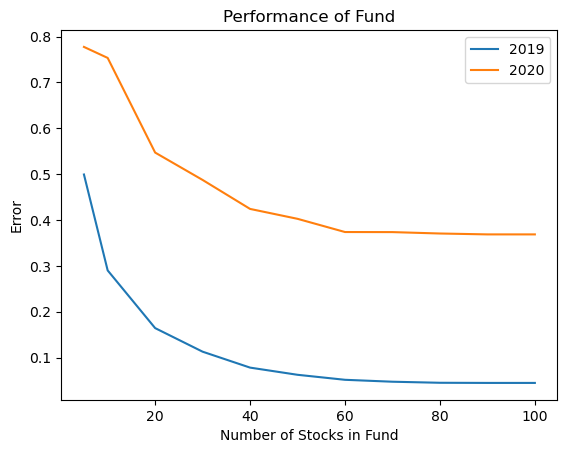

In [141]:
plt.plot(p_size, perf_19, label="2019")
plt.plot(p_size, perf_20, label="2020")

plt.ylabel('Error')
plt.xlabel('Number of Stocks in Fund')
plt.title('Performance of Fund')
plt.legend()

plt.show()

### Visualizations

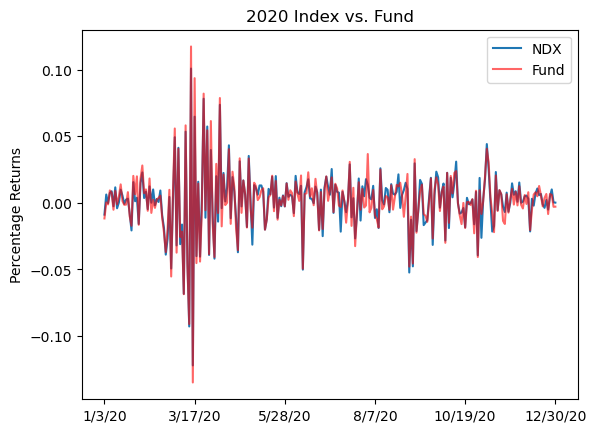

In [172]:
returns_20[index_name].plot()
selected_stocks = stock_selection[0]
stock_weights = stock_ws[0]
sum(returns_20[selected_stocks[i]]*stock_weights[i] for i in range(len(selected_stocks))).plot(label='Fund', alpha=0.6, color="red")

# Add labels and a legend
plt.ylabel('Percentage Returns')
plt.legend()
plt.title('2020 Index vs. Fund')

# Show the plot
plt.show()

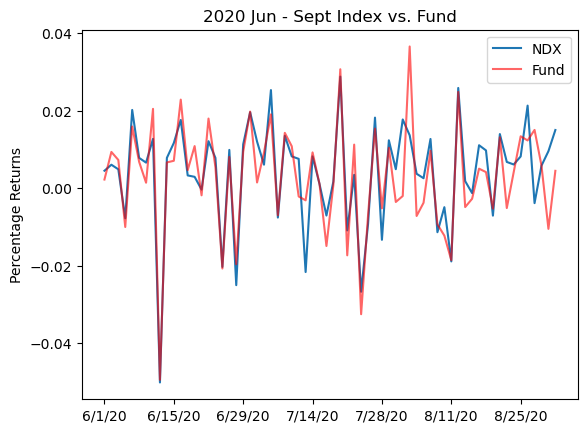

In [173]:
jun_sept = returns_20["6/1/20":"9/1/20"]
jun_sept[index_name].plot()
sum(jun_sept[selected_stocks[i]]*stock_weights[i] for i in range(len(selected_stocks))).plot(label='Fund', alpha=0.6, color="red")

# Add labels and a legend
plt.ylabel('Percentage Returns')
plt.legend()
plt.title('2020 Jun - Sept Index vs. Fund')

# Show the plot
plt.show()

#### Assume we invest 100k for a fund size of 30, 60 and 80

For this scenario we assume we buy the stocks at the beginning of 2020. We want to know how is the value of our portfolio over that year

In [230]:
investment = 100000

## Retrieve values from previous steps 
# 30 size fund
s30 = stock_selection[3]
w30 = stock_ws[3]

# 60 size fund
s60 = stock_selection[6]
w60 = stock_ws[6]

# 80 size fund
s80 = stock_selection[8]
w80 = stock_ws[8]

positions30 = investment*w30/stocks_20.iloc[0][s30]
positions60 = investment*w60/stocks_20.iloc[0][s60]
positions80 = investment*w80/stocks_20.iloc[0][s80]

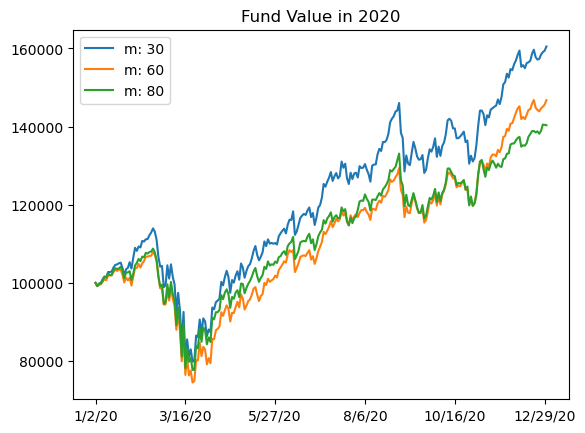

In [268]:
f_value = positions30*stocks_20[s30]
f_value.sum(axis=1).plot(title="Fund Value in 2020", label='m: 30')
f_value = positions60*stocks_20[s60]
f_value.sum(axis=1).plot(title="Fund Value in 2020", label='m: 60')
f_value = positions80*stocks_20[s80]
f_value.sum(axis=1).plot(title="Fund Value in 2020", label='m: 80')

plt.legend()

plt.show()

#### Solving the problem with a single model 

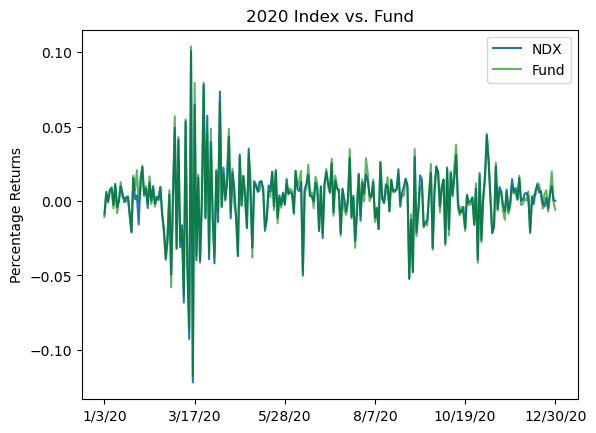

In [262]:
returns_20[index_name].plot()

# plot fund size 5
s = mip_results.loc[5,"stock_selected"]
s = s[s == 1]
w = mip_results.loc[5,"stock_weights"]
w = w.loc[s.index]
sum(returns_20[s.index[i]]*w[i] for i in range(5)).plot(label='Fund', alpha=0.6, color="green")

# # plot fund size 20
# s = mip_results.loc[20,"stock_selected"]
# s = s[s == 1]
# w = mip_results.loc[20,"stock_weights"]
# w = w.loc[s.index]

# sum(returns_20[s.index[i]]*w[i] for i in range(20)).plot(label='Fund size 60', alpha=0.6, color="green")

# Add labels and a legend
plt.ylabel('Percentage Returns')
plt.legend()
plt.title('2020 Index vs. Fund')

# Show the plot
plt.show()

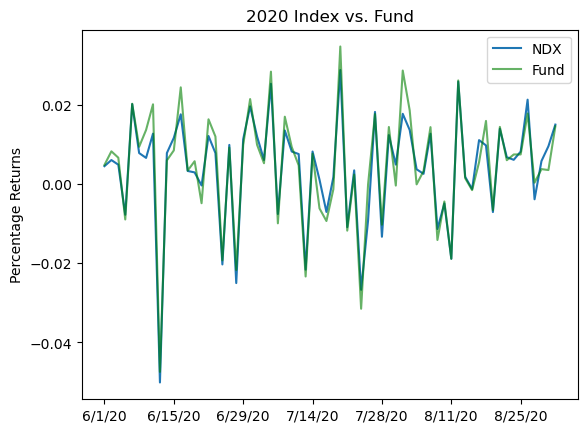

In [263]:
jun_sept[index_name].plot()

# plot fund size 5
s = mip_results.loc[5,"stock_selected"]
s = s[s == 1]
w = mip_results.loc[5,"stock_weights"]
w = w.loc[s.index]
sum(jun_sept[s.index[i]]*w[i] for i in range(5)).plot(label='Fund', alpha=0.6, color="green")

# plot fund size 20
# s = mip_results.loc[20,"stock_selected"]
# s = s[s == 1]
# w = mip_results.loc[20,"stock_weights"]
# w = w.loc[s.index]

# sum(jun_sept[s.index[i]]*w[i] for i in range(20)).plot(label='Fund size 20', alpha=0.6, color="green")

# Add labels and a legend
plt.ylabel('Percentage Returns')
plt.legend()
plt.title('2020 Index vs. Fund')

# Show the plot
plt.show()

#### Assume we invest 100k for a fund size of 30, 60 and 80

For this scenario we assume we buy the stocks at the beginning of 2020. We want to know how is the value of our portfolio over that year

In [238]:
investment = 100000

## Retrieve values from previous steps 
# 30 size fund
s_30 = mip_results.loc[30,"stock_selected"]
s_30 = s_30[s_30 == 1].index.values
w_30 = mip_results.loc[30,"stock_weights"]
w_30 = w_30.loc[s_30].values

# 60 size fund
s_60 = mip_results.loc[60,"stock_selected"]
s_60 = s_60[s_60 == 1].index.values
w_60 = mip_results.loc[60,"stock_weights"]
w_60 = w_60.loc[s_60].values

# 80 size fund
s_80 = mip_results.loc[80,"stock_selected"]
s_80 = s_80[s_80 == 1].index.values
w_80 = mip_results.loc[80,"stock_weights"]
w_80 = w_80.loc[s_80].values


positions_30 = investment*w_30/stocks_20.iloc[0][s_30]
positions_60 = investment*w_60/stocks_20.iloc[0][s_60]
positions_80 = investment*w_80/stocks_20.iloc[0][s_80]

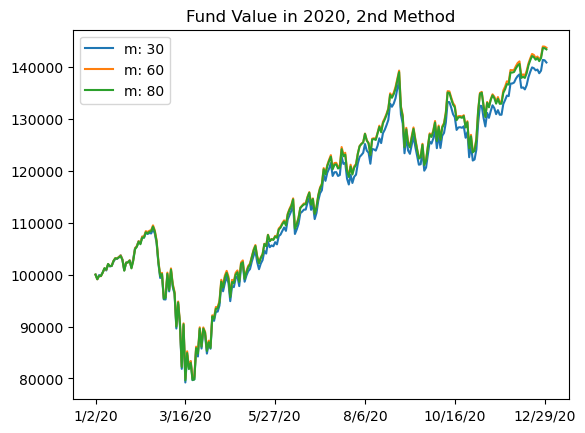

In [270]:
f_value = positions_30*stocks_20[s_30]
f_value.sum(axis=1).plot(title="Fund Value in 2020, 2nd Method", label="m: 30")
f_value = positions_60*stocks_20[s_60]
f_value.sum(axis=1).plot(title="Fund Value in 2020, 2nd Method", label="m: 60")
f_value = positions_80*stocks_20[s_80]
f_value.sum(axis=1).plot(title="Fund Value in 2020, 2nd Method", label="m: 80")

plt.legend()
plt.show()